Notebook is run on Colab. The filepaths should be changed to run on another platform

In [7]:
# import the required packages
import torch
import argparse
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

from torchvision.utils import save_image

from torchvision.utils import make_grid

from torch.utils.tensorboard import SummaryWriter
import datetime
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torch.utils.tensorboard import SummaryWriter
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
from tqdm.notebook import tqdm
import seaborn as sns
import random
from tqdm import tqdm


from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split


import torch
import torchvision.models as models
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.transforms import transforms
from torchvision.utils import make_grid
import torch.nn.functional as F

from torchsummary import summary
import glob 
import shutil
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


import matplotlib
matplotlib.rcParams['axes.grid'] = False

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device
# batch_size = 16

device(type='cuda')

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# 
# !chmod 777 /content/drive/MyDrive/CombinedDataset

In [ ]:
# destination_dir = "/content/drive/MyDrive/CombinedDataset"  
# source_dir = "/content/drive/MyDrive/BeefCattle_Muzzle_database/BeefCattle_Muzzle_Individualized"
# # for img in glob.glob(pattern):
# #     shutil.copytree(img, destination_path)

# # Go through all the subfolders in the source folder
# for root, dirs, files in os.walk(source_dir):
#     for file in files:
#         # Get the absolute path of the file
#         source_file = os.path.join(root, file)
#         # Copy the file to the destination folder
#         shutil.copy(source_file, destination_dir)

In [ ]:
# !mkdir /content/drive/MyDrive/AllDataset

In [ ]:
# !mkdir /content/drive/MyDrive/AllDataset2

# Data Analysis

In [4]:
import os

def count_files(directory):
    # Create an empty list to store the file counts
    file_counts = []

    folder_names = []

    # Iterate over all the subdirectories of the given directory
    for subdir, dirs, files in os.walk(directory):
        # Count the number of files in the current subdirectory
        file_count = len(files)

        cattle_name = os.path.basename(subdir).split("_")[1]
        # Append the file count to the list
        file_counts.append(file_count)
        folder_names.append(cattle_name)

    # Return the list of file counts
    return file_counts, folder_names

# change path to your muzzle database path
folder_path = "/content/drive/MyDrive/BeefCattle_Muzzle_database/BeefCattle_Muzzle_Individualized"
file_counts, folder_names = count_files(folder_path)
print(file_counts)
print(folder_names)

[0, 10, 10, 18, 8, 42, 10, 31, 19, 8, 29, 10, 4, 8, 14, 15, 10, 10, 9, 12, 18, 12, 14, 54, 13, 5, 10, 10, 13, 32, 34, 18, 6, 15, 12, 8, 12, 10, 15, 10, 12, 10, 16, 17, 12, 18, 21, 18, 12, 14, 12, 20, 22, 5, 8, 36, 12, 50, 26, 32, 19, 22, 4, 24, 9, 30, 38, 25, 45, 14, 30, 10, 12, 15, 16, 15, 7, 27, 16, 14, 26, 31, 13, 16, 13, 16, 53, 20, 12, 12, 12, 29, 14, 21, 12, 4, 29, 25, 37, 14, 8, 25, 9, 19, 13, 18, 31, 26, 22, 20, 25, 26, 10, 18, 22, 27, 27, 40, 35, 36, 4, 32, 14, 24, 10, 18, 25, 14, 24, 6, 13, 14, 40, 48, 28, 18, 10, 4, 8, 32, 20, 9, 30, 29, 18, 5, 25, 11, 12, 8, 14, 21, 6, 24, 26, 16, 17, 11, 14, 14, 23, 24, 26, 16, 12, 11, 30, 26, 14, 15, 39, 11, 15, 18, 29, 5, 26, 15, 15, 25, 38, 19, 19, 70, 16, 34, 11, 31, 16, 21, 25, 34, 29, 11, 12, 23, 4, 28, 29, 25, 18, 21, 24, 16, 7, 32, 29, 22, 7, 23, 26, 19, 16, 19, 6, 21, 29, 10, 20, 18, 28, 13, 19, 12, 7, 15, 14, 42, 8, 4, 13, 6, 24, 15, 17, 8, 13, 15, 16, 15, 27, 10, 23, 14, 4, 22, 6, 8, 33, 14, 6, 6, 14, 12, 22, 11, 13, 12, 11, 12,

In [5]:
print(len(folder_names))
#As seeen able "muzzle" which is not a cattle makes the 269th subfolder in the directory

269


([<matplotlib.axis.XTick at 0x7f1bf8b05510>,
 [Text(0, 0, '9801'),
  Text(20, 0, '6282'),
  Text(40, 0, '6124'),
  Text(60, 0, '5836'),
  Text(80, 0, '5697'),
  Text(100, 0, '5508'),
  Text(120, 0, '5297'),
  Text(140, 0, '5143'),
  Text(160, 0, '4895'),
  Text(180, 0, '4678'),
  Text(200, 0, '4363'),
  Text(220, 0, '3814'),
  Text(240, 0, '2510'),
  Text(260, 0, '0400')])

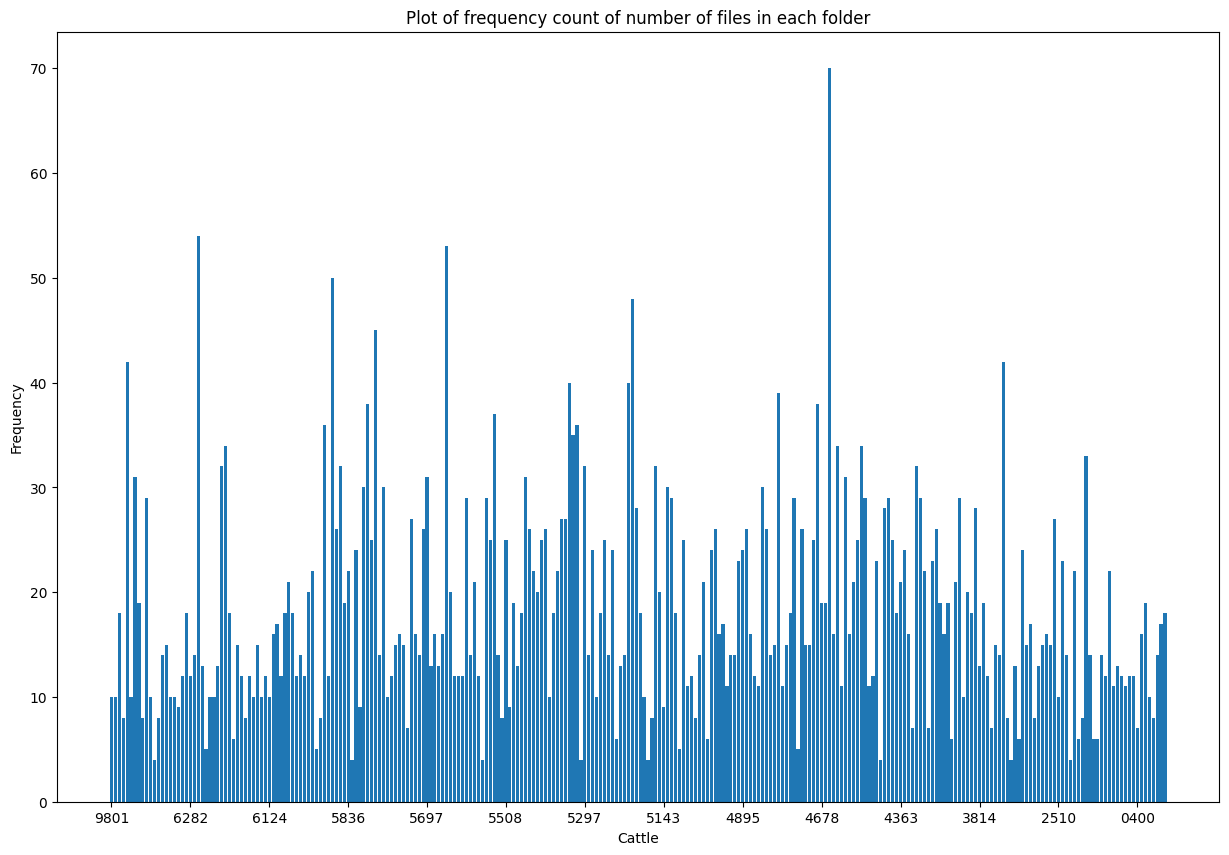

In [6]:
plt.figure(figsize=(15,10))
plt.bar(folder_names[1:],file_counts[1:])
plt.xlabel("Cattle")
plt.ylabel("Frequency")
plt.title("Plot of frequency count of number of files in each folder")
plt.xticks(range(0, 268, 20))

This shows the distribution of all the folders. Only a fraction of the labels were shown for eligibility

Text(0.5, 1.0, 'Analysis of cattles with the maximum and minimum images')

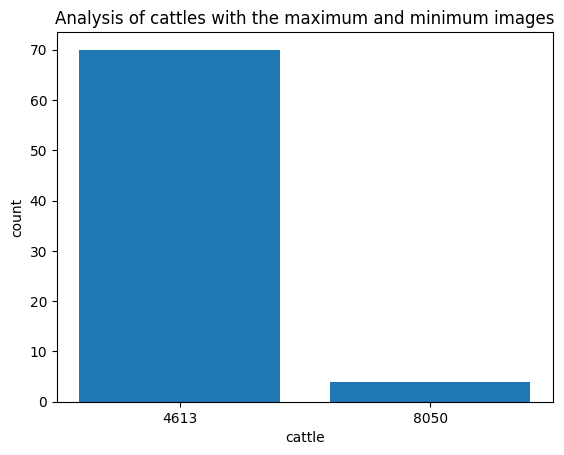

In [7]:
max_file = max(file_counts[1:])
min_file = min(file_counts[1:])

cattle_max_files = folder_names[file_counts.index(max_file)]
cattle_min_files = folder_names[file_counts.index(min_file)]

x = [cattle_max_files, cattle_min_files]
y = [max_file, min_file]


plt.bar(x,y)
plt.xlabel("cattle")
plt.ylabel("count")
plt.title("Analysis of cattles with the maximum and minimum images")


In [12]:
#The folder with the minimum images has 4 images
print(f"The folder with the maximum images has {min_file} images")

The folder with the maximum images has 4 images


In [11]:
#The folder with the maximum images has 70 images
print(f"The folder with the maximum images has {max_file} images")

The folder with the maximum images has 70 images


# Data Splitting

In [14]:
!mkdir /content/train

In [13]:
!mkdir /content/test

In [15]:
import os
import random
import shutil

# Set the percentage of files to be moved to the test directory
test_percentage = 30

# Set the path to the parent directory containing subdirectories
parent_dir_path = "/content/drive/MyDrive/BeefCattle_Muzzle_database/BeefCattle_Muzzle_Individualized"


# Set the path to the directory where test files will be moved
test_dir_path = "/content/test"

# Set the path to the directory where train files will be moved
train_dir_path = "/content/train"

counter = 0
# Loop through each subdirectory in the parent directory
for subdir in os.listdir(parent_dir_path):
    subdir_path = os.path.join(parent_dir_path, subdir)
    if not os.path.isdir(subdir_path):
        continue  # Skip non-directory files
    
    # Get a list of all files in the current subdirectory
    files = os.listdir(subdir_path)
    
    # Shuffle the files randomly
    random.shuffle(files)
    
    # Determine the number of files to move to the test directory
    num_test_files = int(len(files) * test_percentage / 100)
    
    # Move the selected files to the test directory
    for file in files[:num_test_files]:
        src_path = os.path.join(subdir_path, file)
        # dst_path = os.path.join(test_dir_path, subdir, file)
        os.makedirs(test_dir_path, exist_ok=True)  # Create subdirectory if needed
        shutil.copy2(src_path, test_dir_path)

        counter += 1
    
    # Move the remaining files to the train directory
    for file in files[num_test_files:]:
        src_path = os.path.join(subdir_path, file)
        # dst_path = os.path.join(train_dir_path, subdir, file)
        os.makedirs(train_dir_path, exist_ok=True)  # Create subdirectory if needed
        shutil.copy2(src_path, train_dir_path)

        counter += 1


In [17]:
train_files = len(os.listdir(train_dir_path))
print(f"The number of files in the train directory are {train_files}")

The number of files in the train directory are 3565


In [18]:
test_files = len(os.listdir(test_dir_path))
print(f"The number of files in the test directory are {test_files}")

The number of files in the test directory are 1358


In [20]:
#Returns an error if total files in the both folders does not sum up to 4923(the number of files expected)
assert((train_files + test_files) == 4923)


Uncomment the cell below to combine all the images to a single folder

In [21]:
#Extract all files to a single folder to be compatible with torch

In [22]:
!mkdir /content/AllDataset

In [1]:
import os
import shutil

src = "/content/drive/MyDrive/BeefCattle_Muzzle_database/BeefCattle_Muzzle_Individualized"
dest = "/content/AllDataset"
# dest = "/content/drive/MyDrive/check"

for path, subdirs, files in os.walk(src):
    for name in files:
        filename = os.path.join(path, name)
        shutil.copy2(filename, dest)

In [4]:
#Confirm that all files are moved
assert len(os.listdir(dest)) == 4923

In [ ]:

def preprocessing_images(src, dest):
  #Function for preprocessing. Takes a source directory and a destination directory

  # Get the list of images from the folder
  image_list = os.listdir(src)

  # Iterate over the list of images
  for image in image_list:
      # Read the image
      img = cv2.imread(src+image)

      #Filter image using Gaussian filter
      filtered_img = cv2.GaussianBlur(img, (5,5), sigmaX=1.5)

      # Convert the image to grayscale
      img_gray = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)
      
      #resize image
      resized_img = cv2.resize(img_gray, (300,300))

      #Perform histogram equalization
      equalized_img = cv2.equalizeHist(resized_img)

      norm = np.zeros((equalized_img.shape))
      # Normalize the channels
      normalized_img = cv2.normalize(equalized_img, None, 0, 1, cv2.NORM_MINMAX,  dtype=cv2.CV_32F)
      #Note that Colab's imshow still reads the upper bound as 255 instead of 1, hence, the images generated here might be black

      
      #Show final image
      cv2_imshow(equalized_img)
  
      
      # Save the grayscale image
      cv2.imwrite(os.path.join(dest , image), normalized_img)


However, instead of using this preprocessing, we used data transformations/augmentation instead in torch.

In [5]:
dest

'/content/AllDataset'

Old comment: Normalization not yet successful Update: Successful, but Colab's imshow still reads the upper bound as 255 instead of 1.

Extract csv files for train and test set. This is used during training so we don't have to do the extraction again

In [13]:
root_path = "/content/"
train_path = "/content/train"
df = os.path.join(root_path, 'train_dataset.csv')
train_size = 80
i = 0
train_df = pd.DataFrame(columns = ['image_id', 'label']) 

# for (dirpath, dirname, filename) in walk(BASE_PATH):
#   for each_file in filename:

for each_file in os.listdir(train_path):
    train_df.loc[i] = [each_file, str(each_file.split('_')[1])]
    i += 1
print(i)
train_df.to_csv(df, index=False)
train_df.head()

3565


,image_id,label
0,cattle_5774_DSCF6685.jpg,5774
1,cattle_5325_DSCF8207.jpg,5325
2,cattle_6294_DSCF9250.jpg,6294
3,cattle_9736_DSCF8524.jpg,9736
4,cattle_0600_DJI_0143.jpg,0600


In [15]:
root_path = "/content/"
test_path = "/content/test"
df = os.path.join(root_path, 'test_dataset.csv')
i = 0
test_df = pd.DataFrame(columns = ['image_id', 'label']) 

# for (dirpath, dirname, filename) in walk(BASE_PATH):
#   for each_file in filename:

for each_file in os.listdir(test_path):
    test_df.loc[i] = [each_file, str(each_file.split('_')[1])]
    i += 1
print(i)
test_df.to_csv(df, index=False)
test_df.head()

1358


,image_id,label
0,cattle_5717_DSCF7510.jpg,5717
1,cattle_5360_DSCF0477.jpg,5360
2,cattle_6161_DSCF7349.jpg,6161
3,cattle_4456_DSCF1387.jpg,4456
4,cattle_4499_DSCF1223.jpg,4499


In [16]:
#Confirm that all files are included
assert train_df.shape[0] + test_df.shape[0] == 4923

In [20]:
#To download the zip file
!zip -r /content/AllDataset.zip /content/AllDataset

  adding: content/AllDataset/ (stored 0%)
  adding: content/AllDataset/cattle_5717_DSCF7510.jpg (deflated 5%)
  adding: content/AllDataset/cattle_5360_DSCF0477.jpg (deflated 2%)
  adding: content/AllDataset/cattle_6161_DSCF7349.jpg (deflated 1%)
  adding: content/AllDataset/cattle_5774_DSCF6685.jpg (deflated 2%)
  adding: content/AllDataset/cattle_5325_DSCF8207.jpg (deflated 2%)
  adding: content/AllDataset/cattle_6294_DSCF9250.jpg (deflated 1%)
  adding: content/AllDataset/cattle_9736_DSCF8524.jpg (deflated 2%)
  adding: content/AllDataset/cattle_0600_DJI_0143.jpg (deflated 1%)
  adding: content/AllDataset/cattle_5083_DSCF9269.jpg (deflated 1%)
  adding: content/AllDataset/cattle_5143_DSCF7971.jpg (deflated 0%)
  adding: content/AllDataset/cattle_8094_DSCF8496.jpg (deflated 2%)
  adding: content/AllDataset/cattle_5097_DSCF7885.jpg (deflated 2%)
  adding: content/AllDataset/cattle_4456_DSCF1387.jpg (deflated 0%)
  adding: content/AllDataset/cattle_4947_DSCF8051.jpg (deflated 0%)
  addi